# Handwritten equation solver using CNN 

Mathematical equation solver using character and symbol recognition using image processing and CNN.

#### Dataset link : https://www.kaggle.com/datasets/sagyamthapa/handwritten-math-symbols

In [15]:
import matplotlib.pyplot as plt

def show_image(image, title="Image"):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('on')
    plt.show()

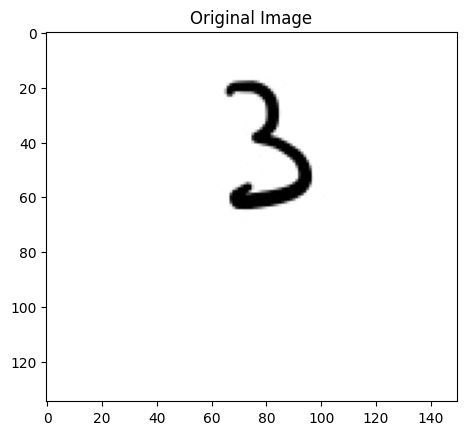

In [16]:
import cv2

image = cv2.imread("dataset/3/38992.jpg", cv2.IMREAD_GRAYSCALE)
show_image(image, title="Original Image")

In [17]:
image.shape

(135, 150)

In [22]:
import numpy as np
import os

def crop_image(img):
    _, thresh = cv2.threshold(img, 240, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        x_min = float('inf')
        y_min = float('inf')
        x_max = 0
        y_max = 0
        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)
            x_min = min(x_min, x)
            y_min = min(y_min, y)
            x_max = max(x_max, x + w)
            y_max = max(y_max, y + h)

        width = x_max - x_min
        height = y_max - y_min
        size = max(width, height)  
        center_x = x_min + width // 2
        center_y = y_min + height // 2

        x_start = max(0, center_x - size // 2)
        y_start = max(0, center_y - size // 2)
        x_end = min(img.shape[1], x_start + size)
        y_end = min(img.shape[0], y_start + size)

        if x_end - x_start < size:
            x_start = max(0, x_end - size)
        if y_end - y_start < size:
            y_start = max(0, y_end - size)

        cropped_img = img[y_start:y_start + size, x_start:x_start + size]
    else:
        return img, min(img.shape[:2])

    return cropped_img, size
    

def resize_image_with_padding(image, size, target_size=(256, 256), padding_size=5, padding_color=255):    
    max_content_size = target_size[0] - 2 * padding_size
    scale = min(max_content_size / size, max_content_size / size)
    new_size = (int(size * scale), int(size * scale))
    resized_img = cv2.resize(image, new_size, interpolation=cv2.INTER_AREA)

    padded_img = cv2.copyMakeBorder(
            resized_img,
            padding_size,  # Top
            padding_size,  # Bottom
            padding_size,  # Left
            padding_size,  # Right
            cv2.BORDER_CONSTANT,
            value=padding_color
        )

    output_img = np.full((target_size[0], target_size[1]), 255, dtype=np.uint8)

    x_offset = (target_size[0] - padded_img.shape[1]) // 2
    y_offset = (target_size[1] - padded_img.shape[0]) // 2
    output_img[y_offset:y_offset + padded_img.shape[0], x_offset:x_offset + padded_img.shape[1]] = padded_img
    return output_img

def load_images_from_folder(folder):
    images = []
    seen = set()
    for filename in os.listdir(folder):
        path = os.path.join(folder, filename)
        img = cv2.imread(path)
        if img is not None:
            img_hash = hash(img.tobytes())
            if img_hash not in seen:
                seen.add(img_hash)
                images.append(img)
    return images

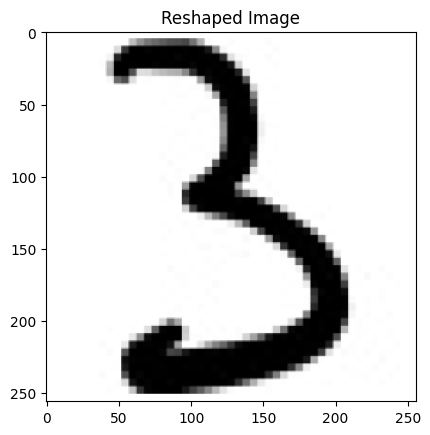

In [23]:
cropped_image, size = crop_image(image)
resized_image = resize_image_with_padding(cropped_image, size)

show_image(resized_image, title="Reshaped Image")

In [26]:
label_map = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4,
             '5': 5, '6': 6, '7': 7, '8': 8, '9': 9,
             'plus': 10, 'minus': 11, 'times': 12, 'div': 13}

def load(folder, label):
    numeric_label = label_map[label]
    data = load_images_from_folder(folder)
    result = []
    for img in data:
        flat = img.flatten() 
        combined = np.append(flat, [numeric_label])
        result.append(combined)
    result = np.array(result, dtype=np.float32) 
    return result


In [27]:
digits_and_symbols = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'plus', 'minus', 'times', 'div']
dataset = []

for char in digits_and_symbols:
    folder_path = fr"dataset\{char}"
    data = load(folder_path, char)
    dataset.append(data)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (570,) + inhomogeneous part.

In [ ]:
print(len(dataset))

14


In [ ]:
def get_image_hash(image_array):
    return hash(image_array.tobytes())


def remove_duplicate_images(image_list):
    seen_hashes = set()
    unique_images = []

    for img in image_list:
        img_hash = hash(img.tobytes())
        if img_hash not in seen_hashes:
            seen_hashes.add(img_hash)
            unique_images.append(img)
    return unique_images

unique_images = remove_duplicate_images(dataset)
print(f"Đã loại bỏ {len(dataset) - len(unique_images)} ảnh trùng lặp.")

In [ ]:
def process_images(dataset):
    new_dataset = []
    for image in dataset:
        cropped_image, size = crop_image(image)
        resized_image = resize_image_with_padding(cropped_image, size)
        new_dataset.append(resized_image)
    return new_dataset

processed_dataset = process_images(unique_images)
print(f"Dataset đã được xử lý, tổng số ảnh: {len(processed_dataset)}")

In [ ]:
from sklearn.utils import shuffle
import pandas as pd

dataset = np.concatenate(dataset)
dataset = shuffle(dataset)
pd.DataFrame(dataset).to_csv("dataset.csv", index=False)

KeyboardInterrupt: 

In [ ]:
dataset.shape

(7750, 65537)